langevin equation is integrated using Leimkuhler Matthews BAOAB integrator to simulate the behaviour of particles trapped in a harmonic potential.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100                      # number of non interacting particles
n = 10000                    # number of timesteps
gamma = 1                    # friction coefficient
m =1                         # mass of particles
kb = 1                       # boltzman constant  
w = gamma/3                  # eigen frequency
h = 0.1                      # timestep
T = 1                        # temperature
teq = 500                    # equilibrium phase

In [3]:
p = np.zeros((n,N))          # momenta
q = np.zeros((n,N))          # positions

In [4]:
q[0,:] = np.random.randint(1,100,N)     # random initial positions

In [76]:
def baoab(n,p,x):
    for i in range(n-1):
        pii = p[i] - 0.5*h*m*w**2*q[i]          # B   
        
        qii = q[i] + 0.5*h*pii/m                # A
        

        R = np.random.normal(0,1,N)
        
        p_cap = np.exp(-h*gamma)*pii + np.sqrt(kb*T*(1-np.exp(-2*gamma*h)))*R  # O
        
        q[i+1] = qii + 0.5*h*p_cap/m            # A
        
        p[i+1] = p_cap - 0.5*h*m*w**2*q[i+1]      # B
        
        
        
        
        
    

In [77]:
baoab(teq,p,q)

In [79]:
p = np.zeros((n,N))
q = np.zeros((n,N))
p[0] = peq
q[0] = qeq

In [78]:
peq = p[499]
qeq = q[499]

In [80]:
baoab(n,p,q)

Text(0.5, 1.0, 'momenta of a single particle')

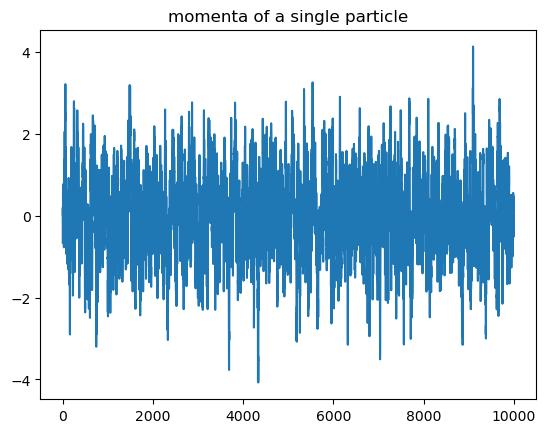

In [106]:
plt.plot(p[:,11])
plt.title('momenta of a single particle')

Text(0.5, 1.0, 'plot of positions')

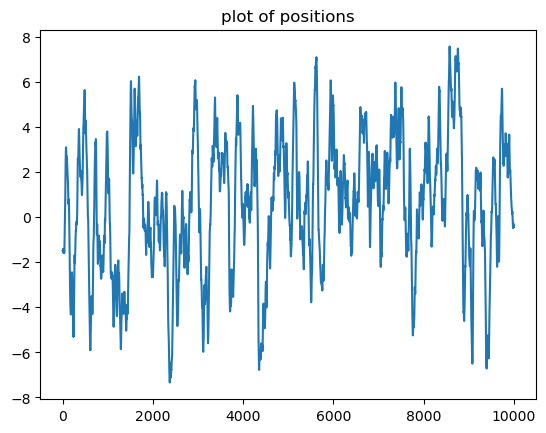

In [107]:
plt.plot(q[:,11])
plt.title('plot of positions')

the positions and momenta deviate from the gaussian distribution because of the random noise.

In [96]:
def energy(p,q):
    potential_energy = 0
    kinetic_energy = 0
    potential_energy += np.average(0.5*m*w**2*q**2,axis=1)
    kinetic_energy += np.average(0.5*p**2,axis=1)
    plt.plot(potential_energy)
    plt.plot(kinetic_energy)
    plt.legend(['potential','kinetic'])
    plt.show
    #plt.plot(kinetic_energy+potential_energy)

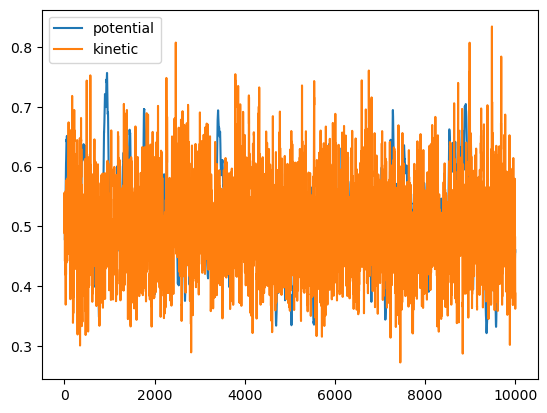

In [97]:
energy(p,q)

Text(0.5, 1.0, 'histogram of positions')

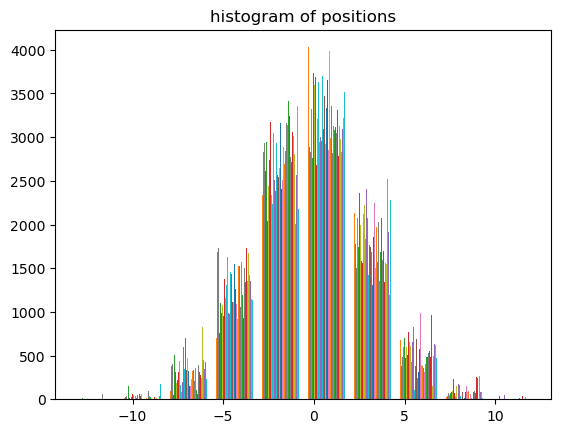

In [99]:
plt.hist(q)
plt.title('histogram of positions')


"""the histogram of poitions should observe a gaussian normal distribution"""

Text(0.5, 1.0, 'histogram of momenta')

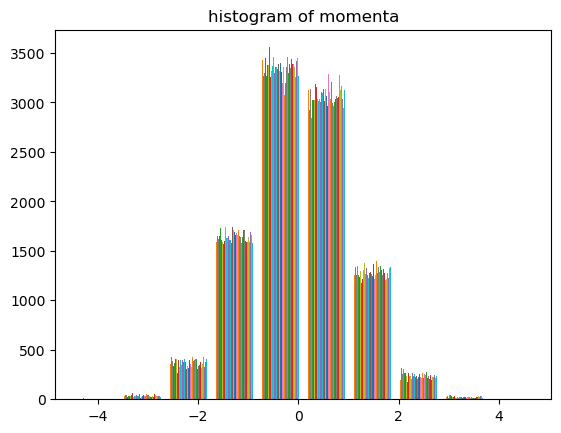

In [98]:
plt.hist(p)
plt.title('histogram of momenta')

In [159]:
a = np.random.normal(0,2,10000)

Text(0.5, 1.0, 'normalized momenta vs expected distribution')

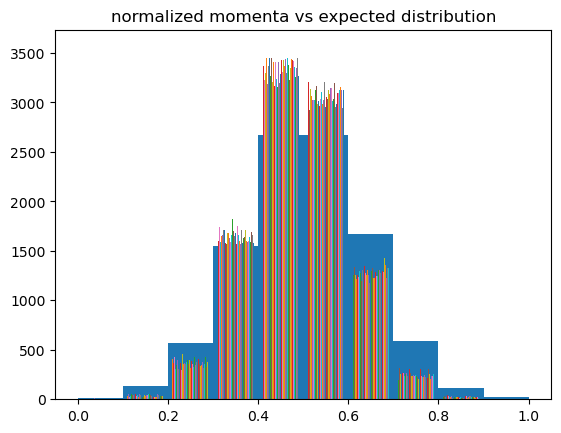

In [162]:
plt.hist(a_norm)
plt.hist(x_norm)

plt.title('normalized momenta vs expected distribution')

In [123]:
p1 = p.reshape(1000000,1)

In [124]:
def min_max_normalize(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    normalized_arr = (arr - min_val) / (max_val - min_val)
    return normalized_arr

In [125]:
z = min_max_normalize(p1)

In [153]:
x_norm = (p-np.min(p))/(np.max(p)-np.min(p))

In [160]:
a_norm = (a-np.min(a))/(np.max(a)-np.min(a))

In [147]:
ahist,x = np.histogram(a_norm)

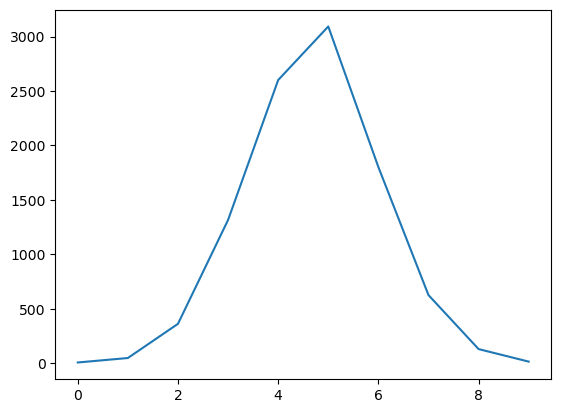

In [148]:
plt.plot(ahist)